In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
print(tf.__version__)

2.3.0


In [ ]:
!wget --no-check-certificate \
http://download850.mediafire.com/n9tcnz08vchg/cawgz6710b93xmw/dataset.zip \
  -O /tmp/dataset.zip


--2020-09-29 04:15:40--  http://download850.mediafire.com/n9tcnz08vchg/cawgz6710b93xmw/dataset.zip
Resolving download850.mediafire.com (download850.mediafire.com)... 205.196.121.45
Connecting to download850.mediafire.com (download850.mediafire.com)|205.196.121.45|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181794485 (173M) [application/zip]
Saving to: ‘/tmp/dataset.zip’

/tmp/dataset.zip    100%[===================>] 173.37M  2.08MB/s    in 85s     

2020-09-29 04:17:06 (2.04 MB/s) - ‘/tmp/dataset.zip’ saved [181794485/181794485]



In [ ]:
# ekstrasi file zip datasets
import zipfile
local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/dataset')

['kucing', 'manusia', 'anjing']

In [ ]:
print("dataset untuk Anjing =",(len(os.listdir('/tmp/dataset/anjing'))))
print("dataset untuk Kucing =",(len(os.listdir('/tmp/dataset/kucing'))))
print("dataset untuk Manusia =",(len(os.listdir('/tmp/dataset/manusia'))))

dataset untuk Anjing = 3299
dataset untuk Kucing = 3254
dataset untuk Manusia = 3488


In [ ]:
# membuat nama direktori dan membuat direktori baru 'train' dan 'val'
base_dir = '/tmp/dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
anjing_dir = os.path.join(base_dir,'anjing')
kucing_dir = os.path.join(base_dir,'kucing')
manusia_dir = os.path.join(base_dir,'manusia')

In [ ]:
# memecah direktori menjadi data train dan data validation
train_anjing_dir, val_anjing_dir = train_test_split(os.listdir(anjing_dir), test_size = 0.2)
train_kucing_dir, val_kucing_dir = train_test_split(os.listdir(kucing_dir), test_size = 0.2)
train_manusia_dir, val_manusia_dir = train_test_split(os.listdir(manusia_dir), test_size = 0.2)

In [ ]:
train_anjing = os.path.join(train_dir, 'anjing')
train_kucing = os.path.join(train_dir, 'kucing')
train_manusia = os.path.join(train_dir, 'manusia')

val_anjing = os.path.join(validation_dir, 'anjing')
val_kucing = os.path.join(validation_dir, 'kucing')
val_manusia = os.path.join(validation_dir, 'manusia')

if not os.path.exists(train_anjing):
  os.mkdir(train_anjing)
if not os.path.exists(train_kucing):
  os.mkdir(train_kucing)
if not os.path.exists(train_manusia):
  os.mkdir(train_manusia)

if not os.path.exists(val_anjing):
  os.mkdir(val_anjing)
if not os.path.exists(val_kucing):
  os.mkdir(val_kucing)
if not os.path.exists(val_manusia):
  os.mkdir(val_manusia)

In [ ]:
import shutil

for i in train_anjing_dir:
  shutil.copy(os.path.join(anjing_dir, i), os.path.join(train_anjing, i))
for i in train_kucing_dir:
  shutil.copy(os.path.join(kucing_dir,i), os.path.join(train_kucing,i))
for i in train_manusia_dir:
  shutil.copy(os.path.join(manusia_dir,i), os.path.join(train_manusia,i))

for i in val_anjing_dir:
  shutil.copy(os.path.join(anjing_dir, i), os.path.join(val_anjing, i))
for i in val_kucing_dir:
  shutil.copy(os.path.join(kucing_dir,i), os.path.join(val_kucing,i))
for i in val_manusia_dir:
  shutil.copy(os.path.join(manusia_dir,i), os.path.join(val_manusia,i))  

In [ ]:
print ("train Anjing =",(len(os.listdir('/tmp/dataset/train/anjing'))))
print ("train Kucing =",(len(os.listdir('/tmp/dataset/train/kucing'))))
print ("train Manusia =",(len(os.listdir('/tmp/dataset/train/manusia'))))

train Anjing = 2639
train Kucing = 2603
train Manusia = 2790


In [ ]:
print ("val Anjing =",(len(os.listdir('/tmp/dataset/val/anjing'))))
print ("val Kucing =",(len(os.listdir('/tmp/dataset/val/kucing'))))
print ("val Manusia =",(len(os.listdir('/tmp/dataset/val/manusia'))))

val Anjing = 660
val Kucing = 651
val Manusia = 698


In [ ]:
# membuat image generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    zoom_range  = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    zoom_range  = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
img_shape = (224, 224, 3)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= img_shape[:2],
    batch_size = 100,
    class_mode = 'categorical',
    shuffle = True,
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size= img_shape[:2],
    batch_size = 100,
    class_mode = 'categorical',
    shuffle = True,
)

Found 8032 images belonging to 3 classes.
Found 2009 images belonging to 3 classes.


In [ ]:
base_model = tf.keras.applications.ResNet50V2(input_shape=img_shape, include_top=False, input_tensor=None)

In [ ]:
from keras.constraints import max_norm
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_constraint=max_norm(3)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 5, 5, 32)          589856    
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)              

In [ ]:
ACCURACY_THRESHOLD = 0.97

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
      if(logs.get('accuracy') >= ACCURACY_THRESHOLD):   
        print("\nVal Akurasi Telah mencapai %2.2f%% " %(ACCURACY_THRESHOLD*100))   
        self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 10,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/100
50/50 - 75s - loss: 0.5971 - accuracy: 0.7858 - val_loss: 1.0024 - val_accuracy: 0.6880
Epoch 2/100
50/50 - 72s - loss: 0.2401 - accuracy: 0.9033 - val_loss: 1.0417 - val_accuracy: 0.8460
Epoch 3/100
50/50 - 72s - loss: 0.2114 - accuracy: 0.9173 - val_loss: 1.6365 - val_accuracy: 0.7300
Epoch 4/100
50/50 - 73s - loss: 0.1829 - accuracy: 0.9340 - val_loss: 0.3088 - val_accuracy: 0.8680
Epoch 5/100
50/50 - 73s - loss: 0.1821 - accuracy: 0.9334 - val_loss: 0.3649 - val_accuracy: 0.8720
Epoch 6/100
50/50 - 72s - loss: 0.1685 - accuracy: 0.9361 - val_loss: 0.3685 - val_accuracy: 0.8470
Epoch 7/100
50/50 - 73s - loss: 0.1418 - accuracy: 0.9488 - val_loss: 0.4656 - val_accuracy: 0.8210
Epoch 8/100
50/50 - 73s - loss: 0.1303 - accuracy: 0.9526 - val_loss: 0.1824 - val_accuracy: 0.9300
Epoch 9/100
50/50 - 73s - loss: 0.0982 - accuracy: 0.9618 - val_loss: 0.3917 - val_accuracy: 0.8140
Epoch 10/100
50/50 - 73s - loss: 0.1494 - accuracy: 0.9432 - val_loss: 0.3133 - val_accuracy: 0.8620

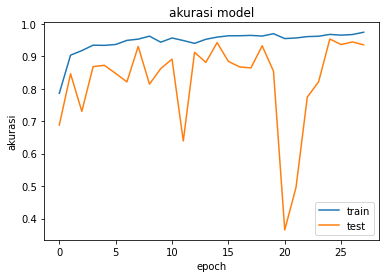

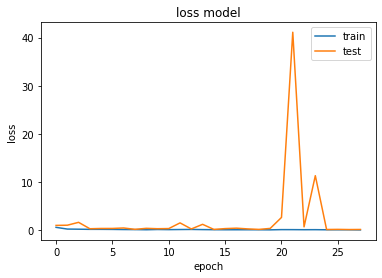

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi model')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [ ]:
print(train_generator.class_indices)

{'anjing': 0, 'kucing': 1, 'manusia': 2}


Saving dog.4992.jpg to dog.4992.jpg
dog.4992.jpg

Peliharaan Manusia, Anjing


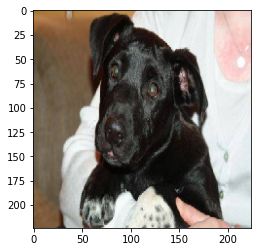

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

#Prediksi Gambar
  path = fn 
  img = image.load_img(path, target_size =(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('\nPeliharaan Manusia, Anjing')
  elif classes[0,1]!=0:
    print('\nPeliharaan Manusia, Kucing')
  elif classes [0,2]!=0:
    print('\nManusia')

Saving cat.4860.jpg to cat.4860.jpg
cat.4860.jpg

Peliharaan Manusia, Kucing


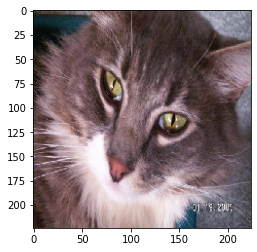

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

#Prediksi Gambar
  path = fn 
  img = image.load_img(path, target_size =(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('\nPeliharaan Manusia, Anjing')
  elif classes[0,1]!=0:
    print('\nPeliharaan Manusia, Kucing')
  elif classes [0,2]!=0:
    print('\nManusia')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpxct5i4ad/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)